In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

In [2]:
imacec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/publicaciones/main/iiec_imacec/imacec.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
iiec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/Clapes%20UC%20IEC%20Coyuntura.csv', parse_dates=True, dayfirst=True, index_col='Fecha')

In [3]:
data = pd.concat([imacec, iiec], axis=1)
data = data.dropna()
data.columns = ['imacec', 'iec', 'iec-m3', 'iec-m12']
data.tail()

,imacec,iec,iec-m3,iec-m12
Fecha,,,,
2020-11-01,0.98,313.5,273.6,321.8
2020-12-01,-0.07,246.3,276.3,307.9
2021-01-01,-2.93,329.6,296.5,307.4
2021-02-01,-2.08,220.1,265.3,296.8
2021-03-01,5.77,170.9,240.2,280.4


<AxesSubplot:xlabel='Fecha'>

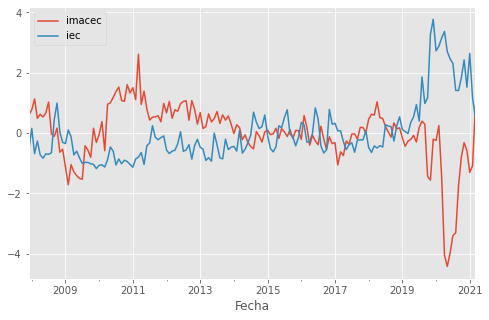

In [4]:
zdata = (data - data.mean()) / data.std()
zdata[['imacec', 'iec']].plot(figsize=(8,5))

<AxesSubplot:>

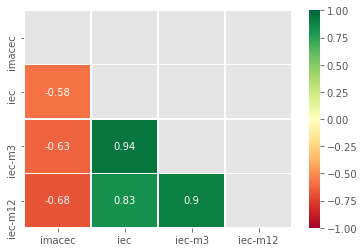

In [6]:
corr_mat = data.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

fig, ax =plt.subplots()
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=-1, vmax=1)

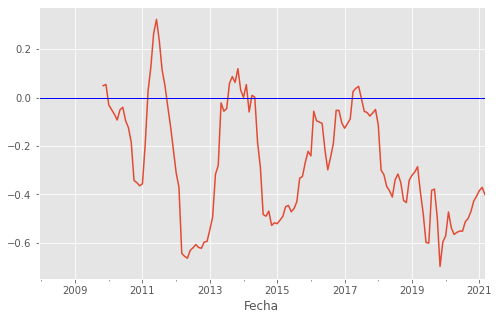

In [16]:
data['corr24'] = data['imacec'].rolling(24).corr(data['iec'])
data['corr24'].plot(figsize=(8,5))
plt.axhline(0, color='blue', linewidth=1)

In [9]:
data['corr24'].describe()

count    137.000000
mean      -0.268858
std        0.237391
min       -0.697419
25%       -0.471606
50%       -0.309844
75%       -0.056368
max        0.323696
Name: corr24, dtype: float64

<AxesSubplot:>

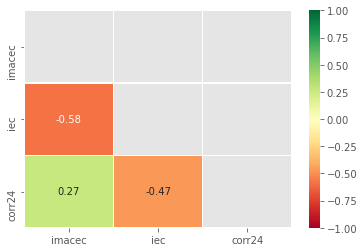

In [28]:
corr_mat = data[['imacec', 'iec', 'corr24']].corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

fig, ax =plt.subplots()
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=-1, vmax=1)

In [40]:
data['l01'] = data['iec'].shift(1)
data['l03'] = data['iec'].shift(3)
data['l06'] = data['iec'].shift(6)
data['l12'] = data['iec'].shift(12)
data.head(15)

,imacec,iec,iec-m3,iec-m12,corr24,iec_l1,iec_l01,iec_l03,iec_l06,iec_l12,l01,l03,l06,l12
Fecha,,,,,,,,,,,,,,
2007-12-01,4.62,93.5,77.1,70.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-01,5.31,144.9,102.9,78.3,NaN,93.5,93.5,NaN,NaN,NaN,93.5,NaN,NaN,NaN
2008-02-01,6.74,82.7,107.0,81.9,NaN,144.9,144.9,NaN,NaN,NaN,144.9,NaN,NaN,NaN
2008-03-01,4.19,113.7,113.8,82.4,NaN,82.7,82.7,93.5,NaN,NaN,82.7,93.5,NaN,NaN
2008-04-01,4.72,80.0,92.2,84.6,NaN,113.7,113.7,144.9,NaN,NaN,113.7,144.9,NaN,NaN
2008-05-01,4.36,71.2,88.3,86.4,NaN,80.0,80.0,82.7,NaN,NaN,80.0,82.7,NaN,NaN
2008-06-01,4.89,81.9,77.7,89.8,NaN,71.2,71.2,113.7,93.5,NaN,71.2,113.7,93.5,NaN
2008-07-01,6.32,81.0,78.0,92.0,NaN,81.9,81.9,80.0,144.9,NaN,81.9,80.0,144.9,NaN
2008-08-01,2.15,84.7,82.5,89.9,NaN,81.0,81.0,71.2,82.7,NaN,81.0,71.2,82.7,NaN


<AxesSubplot:>

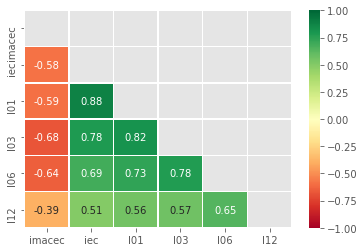

In [41]:
corr_mat = data[['imacec', 'iec', 'l01', 'l03', 'l06', 'l12']].corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

fig, ax =plt.subplots()
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=-1, vmax=1)